In [ ]:
# Authors: Julia Macuga, Paulina Dąbrowska

In [1]:
from datasets.airline_cs import AirlineCSDataset
from random_forest import RandomForestClassifier, TournamentRandomForestClassifier
from tree import DecisionTreeClassifier, RandomizedDecisionTreeClassifier, TournamentDecisionTreeClassifier, RandomizedTournamentDecisionTreeClassifier
import math, time
import seaborn as sns
from utils.experiments import grid_search

In [2]:
path = "../data/airline/Airline_customer_satisfaction.csv"
dataset = AirlineCSDataset(path=path)

In [3]:
dataset.labels.value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [4]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer Type                      129880 non-null  object 
 1   Age                                129880 non-null  int64  
 2   Type of Travel                     129880 non-null  object 
 3   Class                              129880 non-null  object 
 4   Flight Distance                    129880 non-null  int64  
 5   Seat comfort                       129880 non-null  int64  
 6   Departure/Arrival time convenient  129880 non-null  int64  
 7   Food and drink                     129880 non-null  int64  
 8   Gate location                      129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Inflight entertainment             129880 non-null  int64  
 11  Online support                     1298

In [3]:
dataset.clean()

In [4]:
X_train, X_val, y_train, y_val = dataset.split(test_size=0.4, random_state=42)

## DecisionTree

In [7]:
params_matrix = {
    "max_depth": [
        6, 7
    ],
    "max_split_values" : [1000]
}

In [8]:
n_calls = 1
time_start = time.time()
best_params, score, all_results = grid_search(
    params_matrix, DecisionTreeClassifier, X_train, X_val, y_train, y_val, n_calls, path="../out/airline_cs/decision_tree.csv"
)
print(f"Execution time: {time.time() - time_start}")
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All rEsults: {all_results}")

  0%|          | 0/2 [00:00<?, ?it/s]INFO:root:DecisionTreeClassifier(max_depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=23, split_val=0.5, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=22, split_val=0.5, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=4) created
INFO:root:Node(split_feature=21, split_val=0.5, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=2, split_val=3.5, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=21, split_val=0.5, depth=5) created
INFO:root:Node(split_feature=17, split_va

Execution time: 173.85856080055237
Best params: {'max_depth': 7, 'max_split_values': 1000}
Best score: 0.8949607329842932
All rEsults: [{'max_depth': 6, 'max_split_values': 1000, 'accuracy': 0.8837773329226979, 'precision': 0.8575933813892529, 'recall': 0.8910212765957447, 'f1': 0.873987812004341}, {'max_depth': 7, 'max_split_values': 1000, 'accuracy': 0.8949607329842932, 'precision': 0.8991990796052922, 'recall': 0.8647234042553191, 'f1': 0.8816243302457754}]


## Random Forest

In [7]:
n_features = round(math.sqrt(X_train.shape[1]))

In [15]:
params_matrix = {
    "n_trees": [10, 20, 30, 40, 50],
    "max_depth": [
        3, 4, 5, 6, 7
    ],
    "max_split_values" : [1000],
    "max_features": [n_features],
}

In [16]:

path = "../out/airline_cs/random_forestt_classifier.csv"
n_calls = 1
time_start = time.time()
best_params, score, all_results = grid_search(
    params_matrix, RandomForestClassifier, X_train, X_val, y_train, y_val, n_calls, path = path
)
print(f"Execution time: {time.time() - time_start}")
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All rEsults: {all_results}")

  0%|          | 0/25 [00:00<?, ?it/s]INFO:root:RandomForestClassifier: n_trees=10, max_depth=3
INFO:root:DecisionTreeClassifier(max_depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=8, split_val=3.5, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=18, split_val=0.5, depth=2) created
INFO:root:Node(split_feature=6, split_val=4.5, depth=1) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=17, split_val=0.5, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=9, split_val=3.5, d

Execution time: 9502.660490989685
Best params: {'n_trees': 10, 'max_depth': 7, 'max_split_values': 1000, 'max_features': 5}
Best score: 0.8072259008315368
All rEsults: [{'n_trees': 10, 'max_depth': 3, 'max_split_values': 1000, 'max_features': 5, 'accuracy': 0.6687904219279335, 'precision': 0.5780517450946345, 'recall': 0.9916170212765958, 'f1': 0.7303527494397694}, {'n_trees': 10, 'max_depth': 4, 'max_split_values': 1000, 'max_features': 5, 'accuracy': 0.756756236526024, 'precision': 0.6566040999913503, 'recall': 0.969063829787234, 'f1': 0.782805974253648}, {'n_trees': 10, 'max_depth': 5, 'max_split_values': 1000, 'max_features': 5, 'accuracy': 0.7260548198336927, 'precision': 0.6252906505164116, 'recall': 0.9841276595744681, 'f1': 0.7647058823529411}, {'n_trees': 10, 'max_depth': 6, 'max_split_values': 1000, 'max_features': 5, 'accuracy': 0.8013358484755159, 'precision': 0.7003435590283056, 'recall': 0.9802127659574468, 'f1': 0.8169743398769307}, {'n_trees': 10, 'max_depth': 7, 'max_s

In [6]:
params_matrix = {
    "n_trees": [10, 50, 100],
    "max_depth": [
        3, 5, 7
    ],
    "tournament_size": [3, 5, 7],
    "max_split_values" : [1000],
    "max_features": [n_features],
}

NameError: name 'n_features' is not defined

In [ ]:

path = "../out/airline_cs/random_forest_classifier.csv"
n_calls = 1
time_start = time.time()
best_params, score, all_results = grid_search(
    params_matrix, TournamentRandomForestClassifier, X_train, X_val, y_train, y_val, n_calls, path = path
)
print(f"Execution time: {time.time() - time_start}")
print(f"Best params: {best_params}")
print(f"Best score: {score}")
print(f"All rEsults: {all_results}")

# Confusion Matrix

In [5]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
import matplotlib.pyplot as plt
import numpy as np

In [8]:
model = RandomForestClassifier(n_trees=50, max_depth=7, max_features=n_features, max_split_values=1000)
model.fit(X_train, y_train)
y_pred = np.array([model.predict(x) for x in X_val])

INFO:root:RandomForestClassifier: n_trees=50, max_depth=7
INFO:root:DecisionTreeClassifier(max_depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=21, split_val=0.5, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=6, split_val=4.5, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=23, split_val=0.5, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=15, split_val=29.5, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=15, split_val=2.5, depth=6) created
INFO:root:Node(spli

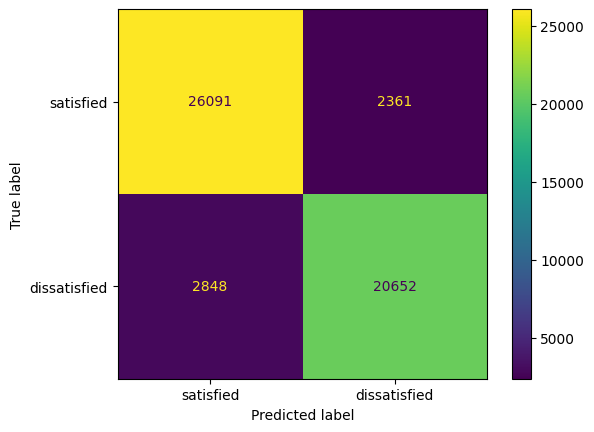

In [10]:
path = "../out/airline_cs/random_forest_cf_d7_nt50.png"
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes_map)
disp.plot()
plt.savefig(path)

In [11]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8997343701878657
F1: 0.8880098037107905
Precision: 0.897405814105071
Recall: 0.8788085106382979


In [13]:
model = TournamentRandomForestClassifier(n_trees=100, max_depth=7, max_features=n_features, tournament_size=7)
model.fit(X_train, y_train)
y_pred = np.array([model.predict(x) for x in X_val])

INFO:root:RandomForestClassifier: n_trees=100, max_depth=7
INFO:root:TournamentRandomForestClassifier: n_trees=100, max_depth=7, tournament_size=7
INFO:root:TournamentDecisionTreeClassifier(max_depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=3, split_val=3.0, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=4, split_val=3.5, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=23, split_val=0.5, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=5, split_val=3.5, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth

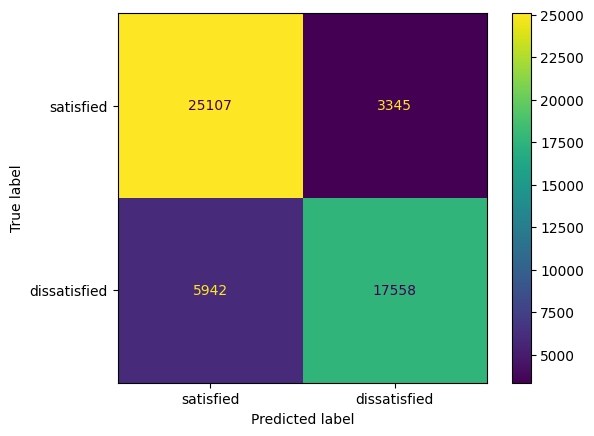

In [14]:
path = "../out/airline_cs/tournament_forest_cf_d7_nt100_t7.png"
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes_map)
disp.plot()
plt.savefig(path)

In [15]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8212388358484756
F1: 0.7908474652613562
Precision: 0.8399751231880591
Recall: 0.7471489361702127
